## Init Libraries

In [141]:
import pandas as pd

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Init Dataset

In [142]:
data = pd.read_csv('../data/german-credit.data')

## Visualizations

### Divorced men have a worse status score than others.

In [143]:
divorced_male_good = data.loc[(data['personal_status'] == 'A91') & (data['credit_status'] == 1)].shape[0]

divorced_male_total = data.loc[(data['personal_status'] == 'A91')].shape[0]

other_male_good = data.loc[((data['personal_status'] == 'A93') | (data['personal_status'] == 'A95')) & (data['credit_status'] == 1)].shape[0]

other_male_total = data.loc[((data['personal_status'] == 'A93') | (data['personal_status'] == 'A95'))].shape[0]

divorced_male_perc = divorced_male_good/divorced_male_total
other_male_percentage = other_male_good/other_male_total



In [144]:
divorced_male_good = data.loc[(data['personal_status'] == 'A91')]
divorced_male_good.employment_years.value_counts()

A73    19
A75    13
A72    11
A74     4
A71     3
Name: employment_years, dtype: int64

In [145]:
single_male_total = data.loc[(data['personal_status'] == 'A93')]

single_male_good = data.loc[(data['personal_status'] == 'A93') & (data['credit_status'] == 1)]
single_male_good.purpose.value_counts()

single_male_total.purpose.value_counts()

A43     146
A40     134
A42      85
A41      70
A49      59
A46      27
A45      12
A410      8
A44       4
A48       3
Name: purpose, dtype: int64

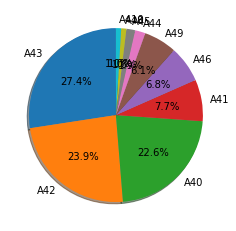

In [146]:
import matplotlib.pyplot as plt

female_data = data.loc[(data['personal_status'] == 'A92') | (data['personal_status'] == 'A95')]

labels = female_data.purpose.value_counts().index.tolist()
sizes = female_data.purpose.value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

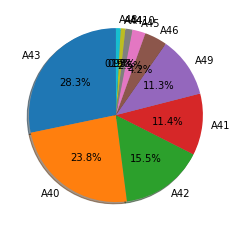

In [147]:
import matplotlib.pyplot as plt

male = data.loc[(data['personal_status'] == 'A91') | (data['personal_status'] == 'A93') | (data['personal_status'] == 'A94')]

labels = male.purpose.value_counts().index.tolist()
sizes = male.purpose.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

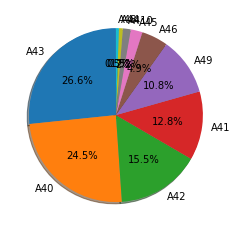

In [148]:
import matplotlib.pyplot as plt

male_single = data.loc[(data['personal_status'] == 'A93')]

labels = male_single.purpose.value_counts().index.tolist()
sizes = male_single.purpose.value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

# PREDICTION
<hr>

In [149]:
# since sklearn doesn't support classified data, this line splits classification into columns 

categorized = pd.get_dummies(data, columns=['checking_account_status', 'credit_history', 'purpose', 'savings_account_status', 'employment_years', 'personal_status', 'guarantors', 'property', 'installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])

## Split Test and Train Data

In [150]:
train, test = train_test_split(categorized, test_size=0.2)

attributes = train.loc[:, train.columns != 'credit_status']
credit_status = train.loc[:,['credit_status']]

attributes_test = test.loc[:, train.columns != 'credit_status']
credit_status_test = test.loc[:,['credit_status']]

## Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

# logistic regression is to predict credit status
# since our dataset is  relatively small, the algorithm expects a bigger iteration number
logistic_regression = LogisticRegression(n_jobs=-1, max_iter=20000)
logistic_regression.fit(attributes, credit_status)
pred_logistic = logistic_regression.predict(attributes_test)

score = accuracy_score(pred_logistic.round(), credit_status_test)

print("Credit Status Prediction Using Logistic Regression: ", "{:.2f}%".format(score * 100))

Credit Status Prediction Using Logistic Regression:  74.00%


## Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(attributes, credit_status)
pred_linear = linear_regression.predict(attributes_test)

score = accuracy_score(pred_linear.round(), credit_status_test)
print("Credit Status Prediction Using Linear Regression: ", "{:.2f}%".format(score * 100))

Credit Status Prediction Using Linear Regression:  72.00%


## GaussianNB

In [153]:
from sklearn.naive_bayes import GaussianNB


NBC = GaussianNB()
NBC.fit(attributes, credit_status)
pred_gauss = NBC.predict(attributes_test)

score = accuracy_score(pred_gauss.round(), credit_status_test)
print(score)

0.72


In [158]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(attributes, credit_status)
pred_MNB = MNB.predict(attributes_test)

score = accuracy_score(pred_gauss.round(), credit_status_test)
print(score)

0.72


## Desicion Tree Classifier

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(min_samples_split = 3)
dt3 = dt3.fit(attributes, credit_status)
pred_desicion_tree = dt3.predict(attributes_test)

score = accuracy_score(pred.round(), credit_status_test)
print(score)

0.635


## Combined

In [155]:
pred_combined = []

s = len(pred_gauss)

for i in range(s):
    one_count = 0
    if pred_gauss[i] == 1:
        one_count += 1
    if pred_linear[i] == 1:
        one_count += 1
    if pred_logistic[i] == 1:
        one_count += 1
    if pred_desicion_tree[i] == 1:
        one_count += 1
    if pred_MNB[i] == 1:
        one_count += 1
    
    if one_count > 1:
        pred_combined.append(1)
    else:
        pred_combined.append(2)
score = accuracy_score(pred_combined, credit_status_test)
print(score)

0.74


## End
<hr>

Status 1 olanlarin miktari 2985.457142857143
Status 2 olanlarin miktari 3938.1266666666666


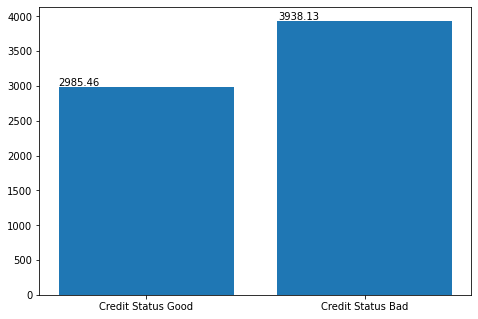

In [156]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = []
ay = data.loc[(data['credit_status'] == 1)]
print("Status 1 olanlarin miktari", ay['credit_amount'].mean())
ratio1 = ay['credit_amount'].mean() 
values.append(round(ratio1,2))

ay1 = data.loc[(data['credit_status'] == 2)]
print("Status 2 olanlarin miktari", ay1['credit_amount'].mean())
ratio2 = ay1['credit_amount'].mean()
values.append(round(ratio2,2))


langs = ['Credit Status Good','Credit Status Bad']
ax.bar(langs,values)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

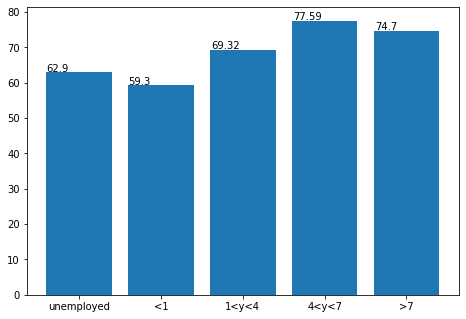

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = []

unemployedStatus1=  data.loc[(data['employment_years'] == 'A71') & (data['credit_status'] == 1)].shape[0]
unemployedAll =  data.loc[(data['employment_years'] == 'A71')].shape[0]
rate0 = unemployedStatus1/unemployedAll
values.append(round(rate0*100,2))

lessThan1yearStatus1 = data.loc[(data['employment_years'] == 'A72') & (data['credit_status'] == 1)].shape[0]
lessThan1yearAll= data.loc[(data['employment_years'] == 'A72')].shape[0]
rate1 = lessThan1yearStatus1/lessThan1yearAll
values.append(round(rate1*100,2))


lessThan4yearStatus1 = data.loc[(data['employment_years'] == 'A73') & (data['credit_status'] == 1)].shape[0] #1<years<4
lessThan4yearAll = data.loc[(data['employment_years'] == 'A73')].shape[0]
rate2 = lessThan4yearStatus1/lessThan4yearAll
values.append(round(rate2*100,2))


lessThan7yearStatus1 = data.loc[(data['employment_years'] == 'A74') & (data['credit_status'] == 1)].shape[0] #4<years<7
lessThan7yearAll = data.loc[(data['employment_years'] == 'A74')].shape[0]
rate3 = lessThan7yearStatus1/lessThan7yearAll
values.append(round(rate3*100,2))

moreThan7yearStatus1 = data.loc[(data['employment_years'] == 'A75') & (data['credit_status'] == 1)].shape[0] #years>7
moreThan7yearAll = data.loc[(data['employment_years'] == 'A75')].shape[0]
rate4 = moreThan7yearStatus1/moreThan7yearAll
values.append(round(rate4*100,2))

langs = ['unemployed','<1', '1<y<4', '4<y<7', '>7']
ax.bar(langs,values)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
